In [1]:
#import important libraries 
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast
import re
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import scipy.stats as stats
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
from wordcloud import WordCloud, STOPWORDS 
import string
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
%matplotlib inline


In [2]:
#read dataset from csv file 
df=pd.read_csv("children_books.csv")

# Explore Data Analysis

In [3]:
#change column type
df["Desc"] = df["Desc"].astype(str)

In [4]:
#drop null values
df.dropna(inplace = True, axis=0)

# Preprocessing

In [5]:
#convert to lower case
df["Desc"] = df["Desc"].str.lower()
df.head()

,Title,Author,Desc,Inerest_age,Reading_age
0,The Girl Who Drank the Moon,Kelly Barnhill,"every year, the evil protectorate offers a bab...",10-14,10-14
1,Time Between Us,Tamara Ireland Stone,sixteen-year-old anna is struggling to underst...,13+,12+
2,Girl Out of Water,Nat Luurtsema,lou brown's swimming ambitions sank without tr...,13-18,10+
3,Captive,A J Grainger,robyn is scared. ever since the attempted assa...,13+,13
4,The School of Music,Rachel Bowen and Meurig Bowen Illustrator: Dan...,welcome to the school of music. in charge is m...,10+,10+


In [6]:
# remove all punctuation from text such as [],\&
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))


In [7]:
#create new column and fill it after cleanup text
df["Desc_pro"] = df["Desc"].apply(lambda text: remove_punctuation(text))
df.head()

,Title,Author,Desc,Inerest_age,Reading_age,Desc_pro
0,The Girl Who Drank the Moon,Kelly Barnhill,"every year, the evil protectorate offers a bab...",10-14,10-14,every year the evil protectorate offers a baby...
1,Time Between Us,Tamara Ireland Stone,sixteen-year-old anna is struggling to underst...,13+,12+,sixteenyearold anna is struggling to understan...
2,Girl Out of Water,Nat Luurtsema,lou brown's swimming ambitions sank without tr...,13-18,10+,lou browns swimming ambitions sank without tra...
3,Captive,A J Grainger,robyn is scared. ever since the attempted assa...,13+,13,robyn is scared ever since the attempted assas...
4,The School of Music,Rachel Bowen and Meurig Bowen Illustrator: Dan...,welcome to the school of music. in charge is m...,10+,10+,welcome to the school of music in charge is ma...


In [8]:
# download stop-words from nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mjeed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [9]:
# function to split the text and remove stop-words 
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [10]:
#create new column and fill it after cleanup text
df["Desc_Vectorizer"] = df["Desc"].apply(lambda text: remove_stopwords(text))


In [11]:
#df["Desc_Vectorizer"] = df["Desc"].apply(lambda text: remove_stopwords(text))


In [12]:
#df["Desc_Vectorizer"] = df["Desc"].apply(lambda text: remove_punctuation(text))
df["Desc_Vectorizer"] = df["Desc_Vectorizer"].apply(lambda text: remove_stopwords(text))


In [13]:
#Preprocessing for the text
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
nltk.download('wordnet')
nltk.download('stopwords')

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


df['Desc_Vectorizer']=df['Desc_Vectorizer'].map(lambda s:preprocess(s))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mjeed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mjeed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#counts the repetation of the word in the text
from collections import Counter
cnt = Counter()
for text in df["Desc_Vectorizer"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('life', 1940),
 ('school', 1585),
 ('one', 1581),
 ('young', 1502),
 ('world', 1420),
 ('new', 1410),
 ('story', 1337),
 ('old', 1237),
 ('time', 1227),
 ('book', 1226)]

In [15]:
# Drop the two columns which are no more needed 


n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["Desc_Vectorizer"] = df["Desc_Vectorizer"].apply(lambda text: remove_rarewords(text))
df.head()

,Title,Author,Desc,Inerest_age,Reading_age,Desc_pro,Desc_Vectorizer
0,The Girl Who Drank the Moon,Kelly Barnhill,"every year, the evil protectorate offers a bab...",10-14,10-14,every year the evil protectorate offers a baby...,every year evil protectorate offers baby evil ...
1,Time Between Us,Tamara Ireland Stone,sixteen-year-old anna is struggling to underst...,13+,12+,sixteenyearold anna is struggling to understan...,sixteen year old anna struggling understand be...
2,Girl Out of Water,Nat Luurtsema,lou brown's swimming ambitions sank without tr...,13-18,10+,lou browns swimming ambitions sank without tra...,lou brown swimming ambitions sank without trac...
3,Captive,A J Grainger,robyn is scared. ever since the attempted assa...,13+,13,robyn is scared ever since the attempted assas...,robyn scared ever since attempted assassinatio...
4,The School of Music,Rachel Bowen and Meurig Bowen Illustrator: Dan...,welcome to the school of music. in charge is m...,10+,10+,welcome to the school of music in charge is ma...,welcome school music charge maestro sergio tru...


In [16]:
# remove repeated words
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["Desc_Vectorizer"] = df["Desc_Vectorizer"].apply(lambda text: remove_freqwords(text))


In [17]:
#lemmatization it's brings context to the words.So it links words with similar meanings to one word.
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["Desc_Vectorizer"] = df["Desc_Vectorizer"].apply(lambda text: lemmatize_words(text))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mjeed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Title,Author,Desc,Inerest_age,Reading_age,Desc_pro,Desc_Vectorizer
0,The Girl Who Drank the Moon,Kelly Barnhill,"every year, the evil protectorate offers a bab...",10-14,10-14,every year the evil protectorate offers a baby...,every year evil protectorate offer baby evil w...
1,Time Between Us,Tamara Ireland Stone,sixteen-year-old anna is struggling to underst...,13+,12+,sixteenyearold anna is struggling to understan...,sixteen year anna struggling understand bennet...
2,Girl Out of Water,Nat Luurtsema,lou brown's swimming ambitions sank without tr...,13-18,10+,lou browns swimming ambitions sank without tra...,lou brown swimming ambition sank without trace...
3,Captive,A J Grainger,robyn is scared. ever since the attempted assa...,13+,13,robyn is scared ever since the attempted assas...,robyn scared ever since attempted assassinatio...
4,The School of Music,Rachel Bowen and Meurig Bowen Illustrator: Dan...,welcome to the school of music. in charge is m...,10+,10+,welcome to the school of music in charge is ma...,welcome music charge maestro sergio trunk thre...


###  using  Count Vectorizer to show the frequency of the words in text

In [18]:
#using count vectorizer to show the frequency of the words in text
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.99, min_df=4, stop_words='english')
dtm = cv.fit_transform(df['Desc_Vectorizer'])

In [19]:
#convert it to array output
dtm = dtm.toarray()

In [20]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(dtm, columns=vocab)

,abandon,abandoning,able,abraham,absorbed,absorbing,accept,accident,accidental,accidentally,...,wrong,wry,wynne,xan,year,yearning,younger,zan,zany,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,4,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3093,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3094,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
len(cv.get_feature_names())

1549

In [22]:
# LDA algorthim of Topic modelling
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=4,random_state=42)
LDA.fit(dtm)

LatentDirichletAllocation(n_components=4, random_state=42)

In [23]:
#print the Topics
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 5 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 5 WORDS FOR TOPIC #0
['thing', 'play', 'friendship', 'music', 'year', 'struggle', 'roger', 'family', 'shakespeare', 'grief', 'amy', 'best', 'mary', 'feeling', 'friend']


THE TOP 5 WORDS FOR TOPIC #1
['dory', 'year', 'plot', 'teen', 'meet', 'want', 'read', 'ben', 'people', 'man', 'mother', 'relationship', 'novel', 'london', 'family']


THE TOP 5 WORDS FOR TOPIC #2
['charley', 'fan', 'dangerous', 'caz', 'baby', 'suzy', 'place', 'love', 'historical', 'reader', 'witch', 'xan', 'twylla', 'magical', 'year']


THE TOP 5 WORDS FOR TOPIC #3
['strange', 'life', 'cole', 'girl', 'jimmy', 'boy', 'bullying', 'feel', 'classmate', 'thing', 'novel', 'bullied', 'butter', 'father', 'make']




In [24]:
topic_results = LDA.transform(dtm)

In [25]:
topic_results.shape

(3096, 4)

In [26]:
topic_results[0].round(2)

array([0.  , 0.  , 0.99, 0.  ])

In [27]:
#create column for LDA results
df['LDA_VEC'] = topic_results.argmax(axis=1)
df.tail()

,Title,Author,Desc,Inerest_age,Reading_age,Desc_pro,Desc_Vectorizer,LDA_VEC
3263,The Name of the Star,Maureen Johnson,louisiana teenager rory is embarking on a new ...,13+,13+,louisiana teenager rory is embarking on a new ...,louisiana teenager rory embarking east london ...,1
3264,Spy for the Queen of Scots,Theresa Breslin,"beautiful young aristocrat ginette, known as j...",12+,12+,beautiful young aristocrat ginette known as je...,beautiful aristocrat ginette known jenny close...,0
3265,Jimmy Corrigan:,Chris Ware,this extraordinary graphic novel is so obvious...,14+,14+,this extraordinary graphic novel is so obvious...,extraordinary graphic novel obviously labour l...,3
3267,Buffalo Soldier,Tanya Landman,plantation slave charley smith is eleven when ...,13+,11+,plantation slave charley smith is eleven when ...,plantation slave charley smith eleven america ...,2
3268,Witchstruck,Victoria Lamb,the future elizabeth i has been imprisoned by ...,12+,12+,the future elizabeth i has been imprisoned by ...,future elizabeth imprisoned half sister queen ...,2


###  using TF-IDF

In [28]:
#using TF-IDF to show the frequency and importance of the words in text
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tfidf1 = TfidfVectorizer(max_df=0.95, min_df=3,stop_words='english')

In [30]:
dtm1 = tfidf1.fit_transform(df['Desc_Vectorizer'])

In [31]:
dtm1.sum()

22806.08112440408

In [32]:
dtm1 = dtm1.toarray()

In [33]:
# get all unique words in the corpus
vocab1 = tfidf1.get_feature_names()
# show document feature vectors
pd.DataFrame(dtm1, columns=vocab1)

,abandon,abandoning,able,abraham,absorbed,absorbing,accept,accident,accidental,accidentally,...,wrong,wry,wynne,xan,year,yearning,younger,zan,zany,zombie
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.096076,0.384303,0.044060,0.0,0.0,0.0,0.00000,0.0
1,0.0,0.0,0.118674,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.213216,0.0,0.0,0.0,0.00000,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.13282,0.0,...,0.0,0.0,0.000000,0.000000,0.060468,0.0,0.0,0.0,0.13282,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0
3092,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0
3093,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0
3094,0.0,0.0,0.000000,0.129277,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0


In [34]:
# LDA algorthim of Topic modelling using TF-IDF
from sklearn.decomposition import LatentDirichletAllocation
LDA1 = LatentDirichletAllocation(n_components=4,random_state=42)
LDA1.fit(dtm1)

LatentDirichletAllocation(n_components=4, random_state=42)

In [35]:
#print the Topics of the model
for index,topic in enumerate(LDA1.components_):
    print(f'THE TOP 4 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 4 WORDS FOR TOPIC #0
['bennett', 'human', 'exploration', 'liam', 'amber', 'music', 'friend', 'robyn', 'xan', 'lou', 'play', 'roger', 'amy', 'year', 'shakespeare']


THE TOP 4 WORDS FOR TOPIC #1
['house', 'novel', 'face', 'feeling', 'poppy', 'murder', 'lake', 'rory', 'people', 'mother', 'teen', 'family', 'dory', 'ben', 'london']


THE TOP 4 WORDS FOR TOPIC #2
['scot', 'frozen', 'dangerous', 'hawke', 'frankenstein', 'man', 'court', 'suzy', 'queen', 'charley', 'meg', 'historical', 'caz', 'mary', 'twylla']


THE TOP 4 WORDS FOR TOPIC #3
['thing', 'life', 'michael', 'bully', 'jimmy', 'classmate', 'father', 'bullying', 'cassandra', 'make', 'nick', 'frank', 'cole', 'bullied', 'butter']




In [36]:
topic_results1 = LDA1.transform(dtm1)

In [37]:
topic_results1.shape

(3096, 4)

In [38]:
df['LDA_tf'] = topic_results1.argmax(axis=1)
df.tail()

,Title,Author,Desc,Inerest_age,Reading_age,Desc_pro,Desc_Vectorizer,LDA_VEC,LDA_tf
3263,The Name of the Star,Maureen Johnson,louisiana teenager rory is embarking on a new ...,13+,13+,louisiana teenager rory is embarking on a new ...,louisiana teenager rory embarking east london ...,1,1
3264,Spy for the Queen of Scots,Theresa Breslin,"beautiful young aristocrat ginette, known as j...",12+,12+,beautiful young aristocrat ginette known as je...,beautiful aristocrat ginette known jenny close...,0,2
3265,Jimmy Corrigan:,Chris Ware,this extraordinary graphic novel is so obvious...,14+,14+,this extraordinary graphic novel is so obvious...,extraordinary graphic novel obviously labour l...,3,3
3267,Buffalo Soldier,Tanya Landman,plantation slave charley smith is eleven when ...,13+,11+,plantation slave charley smith is eleven when ...,plantation slave charley smith eleven america ...,2,2
3268,Witchstruck,Victoria Lamb,the future elizabeth i has been imprisoned by ...,12+,12+,the future elizabeth i has been imprisoned by ...,future elizabeth imprisoned half sister queen ...,2,2


# lsa

In [39]:
## LSA algorthim of Topic modelling
lsa = TruncatedSVD(4)
doc_topic_LSA = lsa.fit_transform(dtm1)
lsa.explained_variance_ratio_

array([0.00413416, 0.03391702, 0.03368653, 0.03282331])

In [40]:
#print the Topics of the model
for index,topic in enumerate(lsa.components_):
    print(f'THE TOP 5 WORDS FOR TOPIC #{index}')
    print([tfidf1.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 5 WORDS FOR TOPIC #0
['father', 'novel', 'grief', 'people', 'family', 'feel', 'feeling', 'thing', 'friend', 'year']


THE TOP 5 WORDS FOR TOPIC #1
['monstrous', 'creature', 'victor', 'version', 'dramatic', 'man', 'mary', 'monster', 'human', 'frankenstein']


THE TOP 5 WORDS FOR TOPIC #2
['cole', 'fast', 'girl', 'caz', 'court', 'historical', 'sister', 'queen', 'mary', 'meg']


THE TOP 5 WORDS FOR TOPIC #3
['child', 'michael', 'magical', 'luna', 'barnhill', 'village', 'evil', 'witch', 'baby', 'xan']




In [41]:
topic_lSA = lsa.transform(dtm1)

topic_lSA.shape

(3096, 4)

In [42]:
#create column for LSA results
df['LSA'] = topic_lSA.argmax(axis=1)




df.head(10)

,Title,Author,Desc,Inerest_age,Reading_age,Desc_pro,Desc_Vectorizer,LDA_VEC,LDA_tf,LSA
0,The Girl Who Drank the Moon,Kelly Barnhill,"every year, the evil protectorate offers a bab...",10-14,10-14,every year the evil protectorate offers a baby...,every year evil protectorate offer baby evil w...,2,0,3
1,Time Between Us,Tamara Ireland Stone,sixteen-year-old anna is struggling to underst...,13+,12+,sixteenyearold anna is struggling to understan...,sixteen year anna struggling understand bennet...,2,0,0
2,Girl Out of Water,Nat Luurtsema,lou brown's swimming ambitions sank without tr...,13-18,10+,lou browns swimming ambitions sank without tra...,lou brown swimming ambition sank without trace...,0,0,0
3,Captive,A J Grainger,robyn is scared. ever since the attempted assa...,13+,13,robyn is scared ever since the attempted assas...,robyn scared ever since attempted assassinatio...,1,0,0
4,The School of Music,Rachel Bowen and Meurig Bowen Illustrator: Dan...,welcome to the school of music. in charge is m...,10+,10+,welcome to the school of music in charge is ma...,welcome music charge maestro sergio trunk thre...,0,0,0
5,The Crystal Stair,Catherine Fisher,the crystal stair picks up after at the world’...,12+,8+,the crystal stair picks up after at the world’...,crystal stair pick end caz live settlement sur...,2,2,2
6,Dark Inside,Jeyn Roberts,after a huge earthquake strikes every continen...,14+,10+,after a huge earthquake strikes every continen...,huge earthquake strike every continent earth s...,0,0,0
7,Kite Spirit,Sita Brahmachari,"when her best friend dawn commits suicide, kit...",13+,12+,when her best friend dawn commits suicide kite...,best friend dawn commits suicide kite fall apa...,0,1,0
8,I Capture the Castle,Dodie Smith,"originally published in 1949, this delightful ...",12+,12+,originally published in 1949 this delightful n...,originally published delightful novel author m...,3,3,0
9,Butter,Erin Jade Lange,"isolated and bullied at school, with a dysfunc...",13+,13+,isolated and bullied at school with a dysfunct...,isolated bullied dysfunctional family weighing...,3,3,0


# NMF

In [43]:
# NMF algorthim of Topic modelling
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=4,random_state=42)
nmf_model.fit(dtm1)

C:\Users\mjeed\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\mjeed\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


NMF(n_components=4, random_state=42)

In [44]:
len(nmf_model.components_)

4

In [45]:
nmf_model.components_

len(nmf_model.components_[0])

1549

In [46]:
#print the Topics of NMF model
for index,topic in enumerate(nmf_model.components_):
    tf_feature_names = tfidf1.get_feature_names()
    print(f'THE TOP 4 WORDS FOR TOPIC #{index}')
    print([tfidf1.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

dtm.shape

THE TOP 4 WORDS FOR TOPIC #0
['amber', 'liam', 'fall', 'father', 'amy', 'best', 'friend', 'feeling', 'grief', 'year']


THE TOP 4 WORDS FOR TOPIC #1
['cole', 'girl', 'historical', 'twylla', 'court', 'sister', 'dory', 'queen', 'meg', 'mary']


THE TOP 4 WORDS FOR TOPIC #2
['target', 'creature', 'monstrous', 'victor', 'man', 'version', 'dramatic', 'human', 'monster', 'frankenstein']


THE TOP 4 WORDS FOR TOPIC #3
['fun', 'bully', 'bullying', 'butter', 'nick', 'frank', 'bullied', 'michael', 'strange', 'people']




(3096, 1549)

In [47]:
topic_NMF = nmf_model.transform(dtm1)

topic_NMF.shape

(3096, 4)

In [48]:
#create column for NMF model results
df['NMF'] = topic_NMF.argmax(axis=1)




df.head(10)

,Title,Author,Desc,Inerest_age,Reading_age,Desc_pro,Desc_Vectorizer,LDA_VEC,LDA_tf,LSA,NMF
0,The Girl Who Drank the Moon,Kelly Barnhill,"every year, the evil protectorate offers a bab...",10-14,10-14,every year the evil protectorate offers a baby...,every year evil protectorate offer baby evil w...,2,0,3,3
1,Time Between Us,Tamara Ireland Stone,sixteen-year-old anna is struggling to underst...,13+,12+,sixteenyearold anna is struggling to understan...,sixteen year anna struggling understand bennet...,2,0,0,0
2,Girl Out of Water,Nat Luurtsema,lou brown's swimming ambitions sank without tr...,13-18,10+,lou browns swimming ambitions sank without tra...,lou brown swimming ambition sank without trace...,0,0,0,0
3,Captive,A J Grainger,robyn is scared. ever since the attempted assa...,13+,13,robyn is scared ever since the attempted assas...,robyn scared ever since attempted assassinatio...,1,0,0,0
4,The School of Music,Rachel Bowen and Meurig Bowen Illustrator: Dan...,welcome to the school of music. in charge is m...,10+,10+,welcome to the school of music in charge is ma...,welcome music charge maestro sergio trunk thre...,0,0,0,3
5,The Crystal Stair,Catherine Fisher,the crystal stair picks up after at the world’...,12+,8+,the crystal stair picks up after at the world’...,crystal stair pick end caz live settlement sur...,2,2,2,1
6,Dark Inside,Jeyn Roberts,after a huge earthquake strikes every continen...,14+,10+,after a huge earthquake strikes every continen...,huge earthquake strike every continent earth s...,0,0,0,3
7,Kite Spirit,Sita Brahmachari,"when her best friend dawn commits suicide, kit...",13+,12+,when her best friend dawn commits suicide kite...,best friend dawn commits suicide kite fall apa...,0,1,0,0
8,I Capture the Castle,Dodie Smith,"originally published in 1949, this delightful ...",12+,12+,originally published in 1949 this delightful n...,originally published delightful novel author m...,3,3,0,0
9,Butter,Erin Jade Lange,"isolated and bullied at school, with a dysfunc...",13+,13+,isolated and bullied at school with a dysfunct...,isolated bullied dysfunctional family weighing...,3,3,0,3


In [49]:
#replace the numbers of topics with it category
df.NMF.replace({0: 'Romantic', 1: 'Horror fiction', 2:'Science fiction', 3: ' Fantasy'}, inplace = True)

In [50]:
first_topic = nmf_model.components_[0]
second_topic = nmf_model.components_[1]
third_topic = nmf_model.components_[2]
third_topiSc = nmf_model.components_[3]

In [51]:
# top words in every topic
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [52]:
lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

In [53]:
first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [tf_feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]

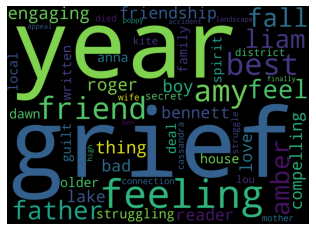

In [54]:
#print the words in each topic
firstcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

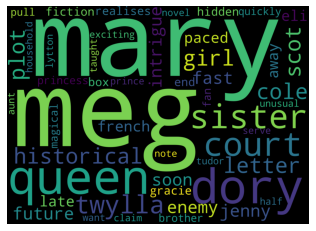

In [55]:
#print the words in each topic
secondcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(second_topic_words))
plt.imshow(secondcloud)
plt.axis('off')
plt.show()

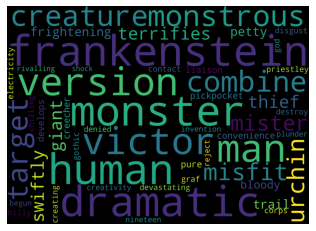

In [56]:
#print the words in each topic
thirdcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(third_topic_words))
plt.imshow(thirdcloud)
plt.axis('off')
plt.show()

# -----

In [57]:
# replacement
df['Reading_age']=df['Reading_age'].str.replace('-','')


In [58]:
#convert the column to string 
df['Reading_age'] = df['Reading_age'].astype(str).str[:2]


In [59]:
df['Reading_age']=df['Reading_age'].str.replace('+','').str.findall(r'(\d+)').apply(lambda x:x[0])

<ipython-input-59-ba9eefc4c7c8>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Reading_age']=df['Reading_age'].str.replace('+','').str.findall(r'(\d+)').apply(lambda x:x[0])


In [60]:
df.Reading_age=df.Reading_age.astype(str)

In [61]:
#reset index of dataframe
df = df.reset_index()

In [62]:
#take copy of dataframe
df1= df.copy()

In [63]:
#remove all duplicates row
df1.drop_duplicates(subset= ['Title'], inplace= True)

# clustring

In [64]:
#import KMean from sklearn.cluster
from sklearn.cluster import KMeans

In [65]:
documents = df1['Desc_Vectorizer'].values.astype('U')

In [66]:
#import TF-IDF from sklearn.feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
vec = TfidfVectorizer(stop_words= 'english')
features = vec.fit_transform(documents)

In [68]:
#defind value for the K
k= 4
model = KMeans(n_clusters=k, init='k-means++', max_iter=39, n_init=1)
model.fit(features)

KMeans(max_iter=39, n_clusters=4, n_init=1)

In [69]:
#create column for cluster results
df1['cluster']= model.labels_

In [70]:
df1.head()

,index,Title,Author,Desc,Inerest_age,Reading_age,Desc_pro,Desc_Vectorizer,LDA_VEC,LDA_tf,LSA,NMF,cluster
0,0,The Girl Who Drank the Moon,Kelly Barnhill,"every year, the evil protectorate offers a bab...",10-14,10,every year the evil protectorate offers a baby...,every year evil protectorate offer baby evil w...,2,0,3,Fantasy,3
1,1,Time Between Us,Tamara Ireland Stone,sixteen-year-old anna is struggling to underst...,13+,12,sixteenyearold anna is struggling to understan...,sixteen year anna struggling understand bennet...,2,0,0,Romantic,1
2,2,Girl Out of Water,Nat Luurtsema,lou brown's swimming ambitions sank without tr...,13-18,10,lou browns swimming ambitions sank without tra...,lou brown swimming ambition sank without trace...,0,0,0,Romantic,1
3,3,Captive,A J Grainger,robyn is scared. ever since the attempted assa...,13+,13,robyn is scared ever since the attempted assas...,robyn scared ever since attempted assassinatio...,1,0,0,Romantic,2
4,4,The School of Music,Rachel Bowen and Meurig Bowen Illustrator: Dan...,welcome to the school of music. in charge is m...,10+,10,welcome to the school of music in charge is ma...,welcome music charge maestro sergio trunk thre...,0,0,0,Fantasy,3


In [71]:
#split the Title & NMF columns and put the result in a new columns
df1['combined_features'] = df1['Title'].apply(lambda x:x.split())

df1['combined_NMF'] = df1['NMF'].apply(lambda x:x.split())

In [72]:
#combine two columns
df1['tags'] = df1['combined_features'] +df1['combined_NMF'] 
df1['tags'].head()

0    [The, Girl, Who, Drank, the, Moon, Fantasy]
1                  [Time, Between, Us, Romantic]
2               [Girl, Out, of, Water, Romantic]
3                            [Captive, Romantic]
4              [The, School, of, Music, Fantasy]
Name: tags, dtype: object

In [73]:
#rename the index column
df1.rename(columns={"index":"book_id"},inplace=True)


In [74]:
#put space to the column
df1['tags'] = df1['tags'].apply(lambda x: " ".join(x))


In [75]:
#import CountVectorizer from sklearn.feature_extraction
from sklearn.feature_extraction.text import CountVectorizer
cv1 = CountVectorizer(max_features=5000,stop_words='english')
    

In [76]:
vector = cv1.fit_transform(df1['tags']).toarray()

In [77]:
#import cosine_similarity from sklearn.metrics.pairwise 
from sklearn.metrics.pairwise import cosine_similarity

In [78]:
#cosine_similarity is a metric, helpful in determining, how similar the data objects are irrespective of their size

similarity = cosine_similarity(vector)

In [79]:
similarity[1]

array([0.        , 1.        , 0.40824829, 0.5       , 0.        ,
       0.        , 0.        , 0.40824829, 0.40824829, 0.        ,
       0.40824829, 0.40824829, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.31622777, 0.        , 0.        ,
       0.40824829, 0.40824829, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.40824829, 0.        , 0.        ,
       0.        , 0.        , 0.40824829, 0.        , 0.        ,
       0.        , 0.        , 0.5       , 0.        ])

In [80]:
df1[df1['Title'] == 'Invictus'].index[0]

29

In [81]:
# print recommender system results 
def recommend(book):
    book_index = df1[df1['Title'] == book].index[0]
    distances = similarity[book_index]
    book_list = sorted(list(enumerate(distances)),reverse=True,key = lambda x: x[1])[1:6]
    for i in book_list:
        print(df1.iloc[i[0]].Title)
        

In [82]:
#give title to recommender system 
recommend("Time Between Us")

Captive
The Sky is Everywhere
Girl Out of Water
Kite Spirit
I Capture the Castle


In [83]:
import pickle

In [84]:
#pickle file to save the model 
pickle.dump(df1,open('book2.pkl','wb'))


In [85]:
#print values
df1['Title'].values

array(['The Girl Who Drank the Moon', 'Time Between Us',
       'Girl Out of Water', 'Captive', 'The School of Music',
       'The Crystal Stair', 'Dark Inside', 'Kite Spirit',
       'I Capture the Castle', 'Butter', 'Dead Jealous',
       'A Flash of Blue', 'Jet Black Heart', "The Sin Eater's Daughter",
       'King Lear - Manga Shakespeare', 'Frankenstein',
       'The Song from Somewhere Else', "Amy & Roger's Epic Detour",
       'The Changes Trilogy', 'The Train to Impossible Places',
       'Half Brother', 'Holding Up the Universe', 'Pop-Up Frankenstein',
       'Mister Creecher', "Don't Pick on Me!", 'Five Hundred Miles',
       'Rules for a Knight', 'Paper Avalanche', 'Ghost World', 'Invictus',
       'The Name of the Star', 'Spy for the Queen of Scots',
       'Jimmy Corrigan:', 'Buffalo Soldier', 'Witchstruck', 'Flyaway',
       'Etiquette and Espionage', 'The Sky is Everywhere', 'Glass Sword'],
      dtype=object)

In [86]:
pickle.dump(df1.to_dict(),open('book_dic_new.pkl','wb'))

In [87]:
pickle.dump(similarity,open('similarity_new.pkl','wb'))

In [88]:
df1.shape

(39, 16)

In [89]:
#remove all columns that dose not give a good results
df1.drop(columns=['LDA_VEC', 'LDA_tf', 'LSA', "cluster"])

,book_id,Title,Author,Desc,Inerest_age,Reading_age,Desc_pro,Desc_Vectorizer,NMF,combined_features,combined_NMF,tags
0,0,The Girl Who Drank the Moon,Kelly Barnhill,"every year, the evil protectorate offers a bab...",10-14,10,every year the evil protectorate offers a baby...,every year evil protectorate offer baby evil w...,Fantasy,"[The, Girl, Who, Drank, the, Moon]",[Fantasy],The Girl Who Drank the Moon Fantasy
1,1,Time Between Us,Tamara Ireland Stone,sixteen-year-old anna is struggling to underst...,13+,12,sixteenyearold anna is struggling to understan...,sixteen year anna struggling understand bennet...,Romantic,"[Time, Between, Us]",[Romantic],Time Between Us Romantic
2,2,Girl Out of Water,Nat Luurtsema,lou brown's swimming ambitions sank without tr...,13-18,10,lou browns swimming ambitions sank without tra...,lou brown swimming ambition sank without trace...,Romantic,"[Girl, Out, of, Water]",[Romantic],Girl Out of Water Romantic
3,3,Captive,A J Grainger,robyn is scared. ever since the attempted assa...,13+,13,robyn is scared ever since the attempted assas...,robyn scared ever since attempted assassinatio...,Romantic,[Captive],[Romantic],Captive Romantic
4,4,The School of Music,Rachel Bowen and Meurig Bowen Illustrator: Dan...,welcome to the school of music. in charge is m...,10+,10,welcome to the school of music in charge is ma...,welcome music charge maestro sergio trunk thre...,Fantasy,"[The, School, of, Music]",[Fantasy],The School of Music Fantasy
5,5,The Crystal Stair,Catherine Fisher,the crystal stair picks up after at the world’...,12+,8,the crystal stair picks up after at the world’...,crystal stair pick end caz live settlement sur...,Horror fiction,"[The, Crystal, Stair]","[Horror, fiction]",The Crystal Stair Horror fiction
6,6,Dark Inside,Jeyn Roberts,after a huge earthquake strikes every continen...,14+,10,after a huge earthquake strikes every continen...,huge earthquake strike every continent earth s...,Fantasy,"[Dark, Inside]",[Fantasy],Dark Inside Fantasy
7,7,Kite Spirit,Sita Brahmachari,"when her best friend dawn commits suicide, kit...",13+,12,when her best friend dawn commits suicide kite...,best friend dawn commits suicide kite fall apa...,Romantic,"[Kite, Spirit]",[Romantic],Kite Spirit Romantic
8,8,I Capture the Castle,Dodie Smith,"originally published in 1949, this delightful ...",12+,12,originally published in 1949 this delightful n...,originally published delightful novel author m...,Romantic,"[I, Capture, the, Castle]",[Romantic],I Capture the Castle Romantic
9,9,Butter,Erin Jade Lange,"isolated and bullied at school, with a dysfunc...",13+,13,isolated and bullied at school with a dysfunct...,isolated bullied dysfunctional family weighing...,Fantasy,[Butter],[Fantasy],Butter Fantasy


In [90]:
df2= pd.read_csv("Books.csv")

C:\Users\mjeed\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [91]:
#drop columns that are no more needed
df2.drop(columns=["ISBN","Book-Title","Year-Of-Publication","Publisher",'Image-URL-S' , "Book-Author","Image-URL-M"], inplace=True)

In [92]:
#change column name
df2.rename(columns={"Image-URL-L":"Image"},inplace=True)

In [93]:
df2

,Image
0,http://images.amazon.com/images/P/0195153448.0...
1,http://images.amazon.com/images/P/0002005018.0...
2,http://images.amazon.com/images/P/0060973129.0...
3,http://images.amazon.com/images/P/0374157065.0...
4,http://images.amazon.com/images/P/0393045218.0...
...,...
271355,http://images.amazon.com/images/P/0440400988.0...
271356,http://images.amazon.com/images/P/0525447644.0...
271357,http://images.amazon.com/images/P/006008667X.0...
271358,http://images.amazon.com/images/P/0192126040.0...


In [94]:
df2 = df2.reset_index()

In [95]:
df2

,index,Image
0,0,http://images.amazon.com/images/P/0195153448.0...
1,1,http://images.amazon.com/images/P/0002005018.0...
2,2,http://images.amazon.com/images/P/0060973129.0...
3,3,http://images.amazon.com/images/P/0374157065.0...
4,4,http://images.amazon.com/images/P/0393045218.0...
...,...,...
271355,271355,http://images.amazon.com/images/P/0440400988.0...
271356,271356,http://images.amazon.com/images/P/0525447644.0...
271357,271357,http://images.amazon.com/images/P/006008667X.0...
271358,271358,http://images.amazon.com/images/P/0192126040.0...


In [96]:
df2.rename(columns={"index":"book_id"},inplace=True)


In [97]:
df1= df1.merge(df2 )

In [98]:
df1.head()

,book_id,Title,Author,Desc,Inerest_age,Reading_age,Desc_pro,Desc_Vectorizer,LDA_VEC,LDA_tf,LSA,NMF,cluster,combined_features,combined_NMF,tags,Image
0,0,The Girl Who Drank the Moon,Kelly Barnhill,"every year, the evil protectorate offers a bab...",10-14,10,every year the evil protectorate offers a baby...,every year evil protectorate offer baby evil w...,2,0,3,Fantasy,3,"[The, Girl, Who, Drank, the, Moon]",[Fantasy],The Girl Who Drank the Moon Fantasy,http://images.amazon.com/images/P/0195153448.0...
1,1,Time Between Us,Tamara Ireland Stone,sixteen-year-old anna is struggling to underst...,13+,12,sixteenyearold anna is struggling to understan...,sixteen year anna struggling understand bennet...,2,0,0,Romantic,1,"[Time, Between, Us]",[Romantic],Time Between Us Romantic,http://images.amazon.com/images/P/0002005018.0...
2,2,Girl Out of Water,Nat Luurtsema,lou brown's swimming ambitions sank without tr...,13-18,10,lou browns swimming ambitions sank without tra...,lou brown swimming ambition sank without trace...,0,0,0,Romantic,1,"[Girl, Out, of, Water]",[Romantic],Girl Out of Water Romantic,http://images.amazon.com/images/P/0060973129.0...
3,3,Captive,A J Grainger,robyn is scared. ever since the attempted assa...,13+,13,robyn is scared ever since the attempted assas...,robyn scared ever since attempted assassinatio...,1,0,0,Romantic,2,[Captive],[Romantic],Captive Romantic,http://images.amazon.com/images/P/0374157065.0...
4,4,The School of Music,Rachel Bowen and Meurig Bowen Illustrator: Dan...,welcome to the school of music. in charge is m...,10+,10,welcome to the school of music in charge is ma...,welcome music charge maestro sergio trunk thre...,0,0,0,Fantasy,3,"[The, School, of, Music]",[Fantasy],The School of Music Fantasy,http://images.amazon.com/images/P/0393045218.0...


In [99]:
pickle.dump(df1.to_dict(),open('book_dic_new_im.pkl','wb'))

In [100]:
#remove all columns that dose not give a good results
df1.drop(columns=['LDA_VEC', 'LDA_tf', 'LSA', "cluster"])

,book_id,Title,Author,Desc,Inerest_age,Reading_age,Desc_pro,Desc_Vectorizer,NMF,combined_features,combined_NMF,tags,Image
0,0,The Girl Who Drank the Moon,Kelly Barnhill,"every year, the evil protectorate offers a bab...",10-14,10,every year the evil protectorate offers a baby...,every year evil protectorate offer baby evil w...,Fantasy,"[The, Girl, Who, Drank, the, Moon]",[Fantasy],The Girl Who Drank the Moon Fantasy,http://images.amazon.com/images/P/0195153448.0...
1,1,Time Between Us,Tamara Ireland Stone,sixteen-year-old anna is struggling to underst...,13+,12,sixteenyearold anna is struggling to understan...,sixteen year anna struggling understand bennet...,Romantic,"[Time, Between, Us]",[Romantic],Time Between Us Romantic,http://images.amazon.com/images/P/0002005018.0...
2,2,Girl Out of Water,Nat Luurtsema,lou brown's swimming ambitions sank without tr...,13-18,10,lou browns swimming ambitions sank without tra...,lou brown swimming ambition sank without trace...,Romantic,"[Girl, Out, of, Water]",[Romantic],Girl Out of Water Romantic,http://images.amazon.com/images/P/0060973129.0...
3,3,Captive,A J Grainger,robyn is scared. ever since the attempted assa...,13+,13,robyn is scared ever since the attempted assas...,robyn scared ever since attempted assassinatio...,Romantic,[Captive],[Romantic],Captive Romantic,http://images.amazon.com/images/P/0374157065.0...
4,4,The School of Music,Rachel Bowen and Meurig Bowen Illustrator: Dan...,welcome to the school of music. in charge is m...,10+,10,welcome to the school of music in charge is ma...,welcome music charge maestro sergio trunk thre...,Fantasy,"[The, School, of, Music]",[Fantasy],The School of Music Fantasy,http://images.amazon.com/images/P/0393045218.0...
5,5,The Crystal Stair,Catherine Fisher,the crystal stair picks up after at the world’...,12+,8,the crystal stair picks up after at the world’...,crystal stair pick end caz live settlement sur...,Horror fiction,"[The, Crystal, Stair]","[Horror, fiction]",The Crystal Stair Horror fiction,http://images.amazon.com/images/P/0399135782.0...
6,6,Dark Inside,Jeyn Roberts,after a huge earthquake strikes every continen...,14+,10,after a huge earthquake strikes every continen...,huge earthquake strike every continent earth s...,Fantasy,"[Dark, Inside]",[Fantasy],Dark Inside Fantasy,http://images.amazon.com/images/P/0425176428.0...
7,7,Kite Spirit,Sita Brahmachari,"when her best friend dawn commits suicide, kit...",13+,12,when her best friend dawn commits suicide kite...,best friend dawn commits suicide kite fall apa...,Romantic,"[Kite, Spirit]",[Romantic],Kite Spirit Romantic,http://images.amazon.com/images/P/0671870432.0...
8,8,I Capture the Castle,Dodie Smith,"originally published in 1949, this delightful ...",12+,12,originally published in 1949 this delightful n...,originally published delightful novel author m...,Romantic,"[I, Capture, the, Castle]",[Romantic],I Capture the Castle Romantic,http://images.amazon.com/images/P/0679425608.0...
9,9,Butter,Erin Jade Lange,"isolated and bullied at school, with a dysfunc...",13+,13,isolated and bullied at school with a dysfunct...,isolated bullied dysfunctional family weighing...,Fantasy,[Butter],[Fantasy],Butter Fantasy,http://images.amazon.com/images/P/074322678X.0...


In [101]:
df1

,book_id,Title,Author,Desc,Inerest_age,Reading_age,Desc_pro,Desc_Vectorizer,LDA_VEC,LDA_tf,LSA,NMF,cluster,combined_features,combined_NMF,tags,Image
0,0,The Girl Who Drank the Moon,Kelly Barnhill,"every year, the evil protectorate offers a bab...",10-14,10,every year the evil protectorate offers a baby...,every year evil protectorate offer baby evil w...,2,0,3,Fantasy,3,"[The, Girl, Who, Drank, the, Moon]",[Fantasy],The Girl Who Drank the Moon Fantasy,http://images.amazon.com/images/P/0195153448.0...
1,1,Time Between Us,Tamara Ireland Stone,sixteen-year-old anna is struggling to underst...,13+,12,sixteenyearold anna is struggling to understan...,sixteen year anna struggling understand bennet...,2,0,0,Romantic,1,"[Time, Between, Us]",[Romantic],Time Between Us Romantic,http://images.amazon.com/images/P/0002005018.0...
2,2,Girl Out of Water,Nat Luurtsema,lou brown's swimming ambitions sank without tr...,13-18,10,lou browns swimming ambitions sank without tra...,lou brown swimming ambition sank without trace...,0,0,0,Romantic,1,"[Girl, Out, of, Water]",[Romantic],Girl Out of Water Romantic,http://images.amazon.com/images/P/0060973129.0...
3,3,Captive,A J Grainger,robyn is scared. ever since the attempted assa...,13+,13,robyn is scared ever since the attempted assas...,robyn scared ever since attempted assassinatio...,1,0,0,Romantic,2,[Captive],[Romantic],Captive Romantic,http://images.amazon.com/images/P/0374157065.0...
4,4,The School of Music,Rachel Bowen and Meurig Bowen Illustrator: Dan...,welcome to the school of music. in charge is m...,10+,10,welcome to the school of music in charge is ma...,welcome music charge maestro sergio trunk thre...,0,0,0,Fantasy,3,"[The, School, of, Music]",[Fantasy],The School of Music Fantasy,http://images.amazon.com/images/P/0393045218.0...
5,5,The Crystal Stair,Catherine Fisher,the crystal stair picks up after at the world’...,12+,8,the crystal stair picks up after at the world’...,crystal stair pick end caz live settlement sur...,2,2,2,Horror fiction,1,"[The, Crystal, Stair]","[Horror, fiction]",The Crystal Stair Horror fiction,http://images.amazon.com/images/P/0399135782.0...
6,6,Dark Inside,Jeyn Roberts,after a huge earthquake strikes every continen...,14+,10,after a huge earthquake strikes every continen...,huge earthquake strike every continent earth s...,0,0,0,Fantasy,3,"[Dark, Inside]",[Fantasy],Dark Inside Fantasy,http://images.amazon.com/images/P/0425176428.0...
7,7,Kite Spirit,Sita Brahmachari,"when her best friend dawn commits suicide, kit...",13+,12,when her best friend dawn commits suicide kite...,best friend dawn commits suicide kite fall apa...,0,1,0,Romantic,3,"[Kite, Spirit]",[Romantic],Kite Spirit Romantic,http://images.amazon.com/images/P/0671870432.0...
8,8,I Capture the Castle,Dodie Smith,"originally published in 1949, this delightful ...",12+,12,originally published in 1949 this delightful n...,originally published delightful novel author m...,3,3,0,Romantic,1,"[I, Capture, the, Castle]",[Romantic],I Capture the Castle Romantic,http://images.amazon.com/images/P/0679425608.0...
9,9,Butter,Erin Jade Lange,"isolated and bullied at school, with a dysfunc...",13+,13,isolated and bullied at school with a dysfunct...,isolated bullied dysfunctional family weighing...,3,3,0,Fantasy,1,[Butter],[Fantasy],Butter Fantasy,http://images.amazon.com/images/P/074322678X.0...
